# 기말프로젝트 (EMNIST)

- label 0-9 : 0-9 (숫자 이미지)
- label 10-35 : a-z (알파벳 이미지)
- label 36-47 : 대문자, 소문자가 다른 알파벳 이미지

Matplot 확인 (12개의 테스트 이미지 출력)

Epoch: 0300 Avg. cost = 0.336
최적화 완료!
정확도: 85.72872


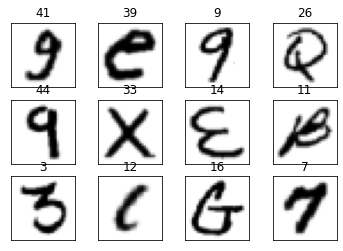

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.data.Dataset
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

#이엠니스트 벨런스: 131600이미지들 분류가능한 클래스 47개 /
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('balanced')#학습
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('balanced')#평가
# train_labels학습 / test_labels 평가

#데이터 처리 관련 사항
train_images = train_images.reshape((112800,784))
test_images = test_images.reshape((18800,784))
#One-hot encoding 변환
train_labels = np.eye(47)[train_labels]
test_labels = np.eye(47)[test_labels]

#################
# 신경망 모델 구성
#################

# 이미지는 MINST똑같이 28X28을 사용 784
X = tf.placeholder(tf.float32, [None, 784])
# 글래스가 왜 47개냐 숫자이미지 + 알파벳 이미지 + 대소문자가 다른 알파벳 이미지
Y = tf.placeholder(tf.float32, [None, 47])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 47], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

#################
#신경망 모델 학습
#################

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(300):
    total_cost = 0
    _, cost_val = sess.run([optimizer, cost], feed_dict={X:train_images , Y:train_labels , keep_prob: 0.8})
    total_cost += cost_val


print('Epoch:', '%04d' % (epoch + 1),
      'Avg. cost =', '{:.3f}'.format(total_cost))

print('최적화 완료!')

#####
#평가
#####

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy*100, feed_dict={X: test_images, Y:test_labels, keep_prob: 1}))

###########
#matplotlib
###########
labels = sess.run(model, feed_dict={X: test_images, Y: test_labels, keep_prob: 1})
fig = plt.figure()
for i in range(12):
    subplot = fig.add_subplot(3, 4, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow( test_images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()
%matplotlib inline